## Homework - Chp 2 -  Machine Learning for Regressions

In [3]:
import pandas as pd
import numpy as np

we will use the Laptops price dataset 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


we'll normalize the names of the columns:

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [8]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

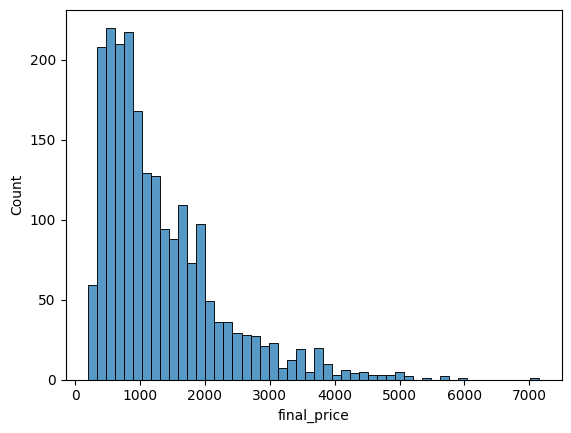

In [10]:
sns.histplot(df.final_price, bins=50)

In [14]:
columns = ['ram', 'storage', 'screen',
        'final_price']
df = df[columns]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


## Question 1 - There's one column with missing values. What is it?

In [15]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Answer: screen

## Question 2 What's the median (50% percentile) for variable 'ram'?

In [18]:
df['ram'].median()

np.float64(16.0)

16.0

## Prepare and split the dataset

In [61]:
# take dataset split it into 3 parts - training 60% , validation 20%, testing 20%
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test #instead of 0.6 we do this to avoid skipping data

In [62]:
n , n_val, n_test, n_train

(2160, 432, 432, 1296)

In [63]:
idx= np.arange(n)

In [64]:
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [65]:
np.random.seed(42)

In [66]:
np.random.shuffle(idx)

In [67]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [68]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [69]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [70]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [71]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [72]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [73]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [74]:
def prepare_X(df, navalues):
    df_num = df.fillna(navalues)
    X = df_num.values
    return X

In [77]:
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


## Question 3 - Fill Navalues with 0 or mean ?

with 0 :

In [76]:
#training dataset
X_train = prepare_X(df_train, navalues=0)
w0, w = train_linear_regression(X_train, y_train)
#validation data set
X_val = prepare_X(df_val, navalues=0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(597.3635593619622)

with mean of Ram

In [57]:
#training dataset
meanram = df_train.ram.mean()
X_train = prepare_X(df_train, navalues=meanram)
w0, w = train_linear_regression(X_train, y_train)
#validation data set
X_val = prepare_X(df_val, navalues=meanram)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(600.3637630345228)

Answer: with zero

## Question 4 - Which r is the best??

In [78]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [81]:
X_train = prepare_X(df_train, navalues=0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val, navalues=0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(597.3616819856013)

In [85]:
for r in [0, 0.01, 1, 10, 100]:
    X_train = prepare_X(df_train, navalues=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, navalues=0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('%06s %0.2f' % (r, score))

     0 597.36
  0.01 597.36
     1 597.21
    10 597.06
   100 597.90


Answer r = 10

## Question 5 - Different seed values

In [104]:
def train_model_by_seed(seed):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test 
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, navalues=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, navalues=0)
    y_pred = w_0 + X_val.dot(w)
    result = rmse(y_val, y_pred)
    return result

    
    
    

In [105]:
train_model_by_seed(0)

np.float64(565.4520868771027)

In [108]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    rmses.append(train_model_by_seed(s))

In [109]:
rmses

[np.float64(565.4520868771027),
 np.float64(636.7985423056726),
 np.float64(588.9558697907962),
 np.float64(597.8148920012521),
 np.float64(571.962791511102),
 np.float64(573.2383256618949),
 np.float64(647.3438328407208),
 np.float64(550.4398184485952),
 np.float64(587.333503616991),
 np.float64(576.1017929433108)]

In [110]:
np.std(rmses)

np.float64(29.17649125829274)

## Question 6: RMSE for seed 9

In [121]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test 
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']



    
    
    

In [122]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, navalues=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, navalues=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)

608.609982204956
